In [1]:
# 导入一些必要的库
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression   # 逻辑回归模型
from sklearn.model_selection import train_test_split  # 用来拆分训练和测试数据

In [2]:
# 读取数据
data = pd.read_csv('banking.csv', header=0)
#data = data.dropna()
# 打印数据大小
#print(data.shape)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [3]:
data.shape

(41188, 21)

In [4]:
data = data.dropna()
data.shape

(41188, 21)

In [5]:
# 打印数据的列名
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [6]:
# 计算正样本和负样本的比例
count_no_sub = len(data[data['y']==0])  # 计算负样本个数
count_sub = len(data[data['y']==1])     # 计算正样本个数
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)  # 计算百分比
print('未开户的百分比:  %.2f%%' % (pct_of_no_sub*100)) 
pct_of_sub = count_sub/(count_no_sub+count_sub)       
print('开户的百分比:  %.2f%%' % (pct_of_sub*100))

未开户的百分比:  88.73%
开户的百分比:  11.27%


In [7]:
# 把"education“字段里的三个值 "basic.9y", "basic.6y", "basic.4y"合并成同一个值"Basic"
print (data['education'].unique())
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
print (data['education'].unique())


['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


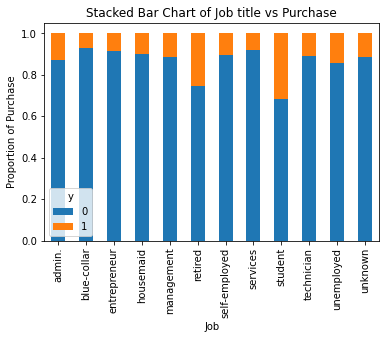

In [8]:
# 数据可视化分析：Job字段和预测变量之间关系
%matplotlib inline
table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job title vs Purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Purchase')
plt.savefig('purchase_vs_job')

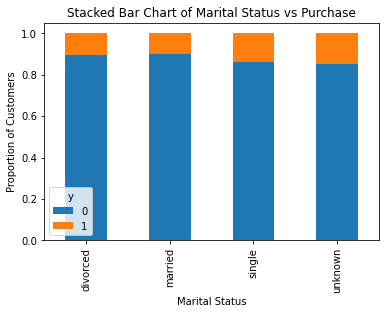

In [9]:
# 数据可视化分析：Marital Status字段和预测变量之间关系
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

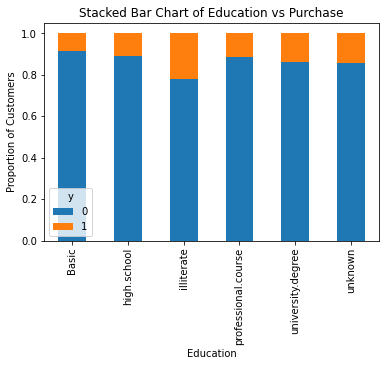

In [10]:
# 数据可视化分析：Education字段和预测变量之间关系
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

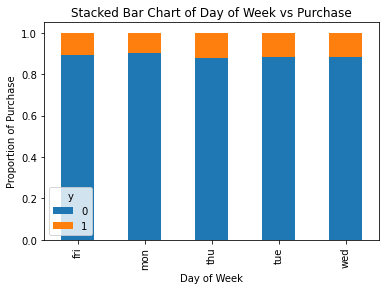

In [11]:
# 数据可视化分析：Day of week字段和预测变量之间关系
# 我们可以发现，这个字段跟预测变量之间关系相对较弱
table=pd.crosstab(data.day_of_week,data.y)#.plot(kind='bar')
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Day of Week vs Purchase')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Purchase')
plt.savefig('dow_vs_purchase')

In [12]:
# 类别型变量需要转换成独热编码形式，列出所有类别型变量
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
# TODO 每个变量转换成类别型变量， 参考函数 pd.get_dummies
    cat_list = pd.get_dummies(data[var], prefix=var)
    data=data.join(cat_list)

In [13]:
print(data)

       age          job  marital            education  default housing loan  \
0       44  blue-collar  married                Basic  unknown     yes   no   
1       53   technician  married              unknown       no      no   no   
2       28   management   single    university.degree       no     yes   no   
3       39     services  married          high.school       no      no   no   
4       55      retired  married                Basic       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   59      retired  married          high.school  unknown      no  yes   
41184   31    housemaid  married                Basic  unknown      no   no   
41185   42       admin.   single    university.degree  unknown     yes  yes   
41186   48   technician  married  professional.course       no      no  yes   
41187   25      student   single          high.school       no      no   no   

         contact month day_of_week  ...  month_oct 

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
未开户的百分比:  88.73%
开户的百分比:  11.27%
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


/Users/wenzheli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7325
           1       0.67      0.41      0.51       913

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



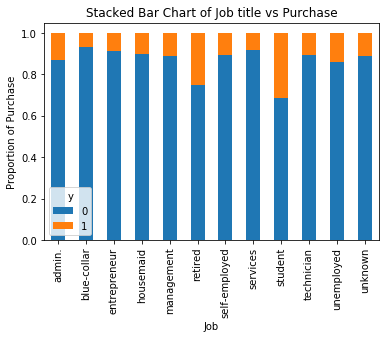

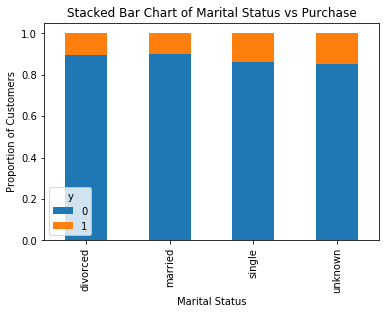

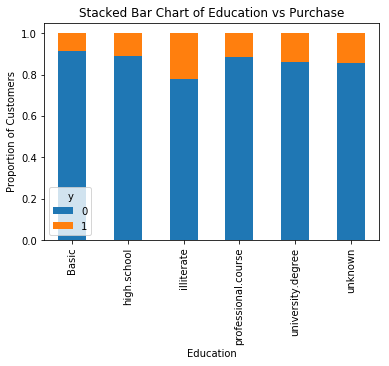

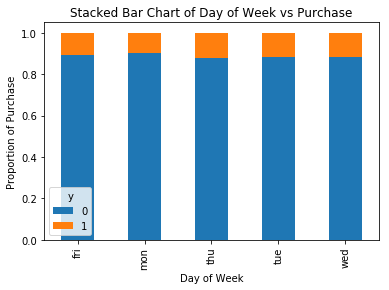

In [18]:
# 导入一些必要的库
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression   # 逻辑回归模型
from sklearn.model_selection import train_test_split  # 用来拆分训练和测试数据


# 读取数据
data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
# 打印数据大小
print(data.shape)

# 打印数据的列名
print(list(data.columns))

# 计算正样本和负样本的比例
count_no_sub = len(data[data['y']==0])  # 计算负样本个数
count_sub = len(data[data['y']==1])     # 计算正样本个数
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)  # 计算百分比
print('未开户的百分比:  %.2f%%' % (pct_of_no_sub*100)) 
pct_of_sub = count_sub/(count_no_sub+count_sub)       
print('开户的百分比:  %.2f%%' % (pct_of_sub*100))


# 把"education“字段里的三个值 "basic.9y", "basic.6y", "basic.4y"合并成同一个值"Basic"
print (data['education'].unique())
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])


# 数据可视化分析：Job字段和预测变量之间关系
%matplotlib inline
table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job title vs Purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Purchase')
plt.savefig('purchase_vs_job')


# 数据可视化分析：Marital Status字段和预测变量之间关系
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')


# 数据可视化分析：Education字段和预测变量之间关系
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')


# 数据可视化分析：Day of week字段和预测变量之间关系
# 我们可以发现，这个字段跟预测变量之间关系相对较弱
table=pd.crosstab(data.day_of_week,data.y)#.plot(kind='bar')
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Day of Week vs Purchase')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Purchase')
plt.savefig('dow_vs_purchase')


# 类别型变量需要转换成独热编码形式，列出所有类别型变量
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
# TODO 每个变量转换成类别型变量， 参考函数 pd.get_dummies
    cat_list = pd.get_dummies(data[var], prefix=var)
    data=data.join(cat_list)
    
# 剔除掉原来类别型变量，只保留独热编码
data_final=data.drop(cat_vars, axis=1)
data_final.columns.values

# todo: standarization


# TODO 构造训练数据，X为特征，y为标签
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y'].values.ravel()

# TODO 把数据分为训练和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练逻辑回归模型
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# TODO 初始化逻辑回归模型并在训练数据上训练
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train, y_train)

# TODO 计算F1-SCORE， 使用classification_report函数
y_pred = logreg.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Q :  准确率评估方法为什么对于不平衡的样本来说，不是一个好的评价指标？
#  负样本：990  正样本：10
#  默认的准确率： 99%
# 样本不平衡的时候，准确率没有任何意义

